In [304]:
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde

## 1. 金融商品のシミュレーション
#https://media.rakuten-sec.net/articles/-/35499?page=2#:~:text=S%26P500%E6%8C%87%E6%95%B0%EF%BC%88%E5%86%86%EF%BC%89%E3%81%AE%E3%83%AA%E3%82%BF%E3%83%BC%E3%83%B3,%E6%A8%99%E6%BA%96%E5%81%8F%E5%B7%AE%EF%BC%89%E3%81%AF18.1%EF%BC%85%E3%80%82

### 1.1 利益率の可視化(一括)

In [305]:
interest_rate = 0.06                     # 年利の平均値
rate_risk = 0.20                         # リスク値
operational_term_list = [5, 10 , 15, 20] # 運用期間
simulate_size = 10000                    # 趣味レーション回数
target_profit_margin = 2               # 目標とする倍率
x = np.linspace(-1, 6, 1000)

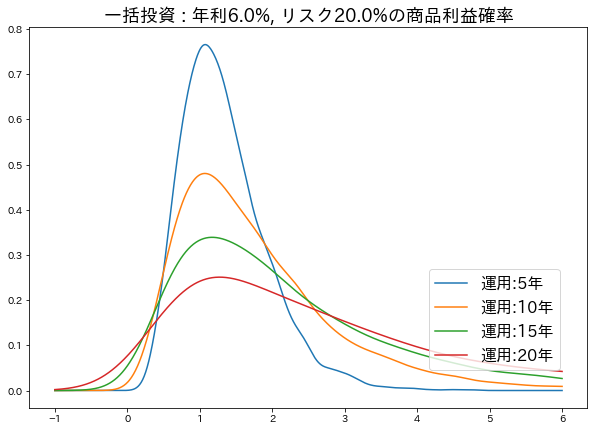

In [306]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
per_list = []
loss_per_list = []
for operational_term in operational_term_list:
    random_rate = np.random.normal(loc=interest_rate, scale=rate_risk, size=(simulate_size, operational_term)) 
    random_rate = random_rate + 1 # 福利を求めるために1(100%)を足す
    result = random_rate.prod(axis=1) #列方向の積を求める
    density_result = gaussian_kde(result) #密度推定

    ax.plot(x, density_result(x), label=f'運用:{operational_term}年')
    # plt.hist(result, cumulative=True, bins=1000, density=True, histtype="step", label=f'運用:{operational_term}年')
    
    percentage = len(result[result >= target_profit_margin]) / len(result) #目標とする運用に達する確率
    per_list.append(percentage)
    loss_per = len(result[result < 1]) / len(result) #元本割れする確率
    loss_per_list.append(loss_per)

plt.title(f'一括投資 : 年利{interest_rate * 100:.1f}%, リスク{rate_risk * 100}%の商品利益確率', fontsize=18)
plt.legend(bbox_to_anchor=(0.95, 0.1), loc='lower right', borderaxespad=0, fontsize=16)
# plt.xlim(-0.1, 8)
plt.savefig(f'一括投資 : 年利{interest_rate * 100:.1f}%, リスク{rate_risk * 100}%の商品利益確率.jpeg')
plt.show()

### 1.2. 金融商品の運用結果予想

In [307]:
for i in [f'{term}年後に資産が{target_profit_margin}倍以上に増える確率{per * 100:.1f}%' for term, per in zip(operational_term_list, per_list)]:
    print(i)

5年後に資産が2倍以上に増える確率13.0%
10年後に資産が2倍以上に増える確率32.8%
15年後に資産が2倍以上に増える確率45.7%
20年後に資産が2倍以上に増える確率55.7%


In [308]:
for i in [f'{term}年後に資産が元本割れしている確率{per * 100:.1f}%' for term, per in zip(operational_term_list, loss_per_list)]:
    print(i)

5年後に資産が元本割れしている確率31.3%
10年後に資産が元本割れしている確率25.6%
15年後に資産が元本割れしている確率21.7%
20年後に資産が元本割れしている確率18.9%


## 2.資産運用シミュレーション(一括投資)

In [309]:
reserve_amount = 8000000  # 一括積立金額
simulation_term = 20     #シミュレーション年数


In [310]:
#シミュレーション年数　✖️ シミュレーション回数の結果
asset_management_results = []
for term in range(simulation_term):
    random_rate = np.random.normal(loc=interest_rate, scale=rate_risk, size=(simulate_size, term)) 
    random_rate = random_rate + 1 # 福利を求めるために1(100%)を足す
    result = random_rate.prod(axis=1) #列方向の積を求める
    asset_management_results.append(result)
asset_management_results = np.array(asset_management_results)
asset_management_results = asset_management_results * reserve_amount

In [311]:
#シミュレーションの平均値、中央値、標準偏差を求める
result_mean = asset_management_results.mean(axis=1)
result_median = np.median(asset_management_results, axis=1)
result_std = asset_management_results.std(axis=1)

x = np.arange(1, simulation_term+1)

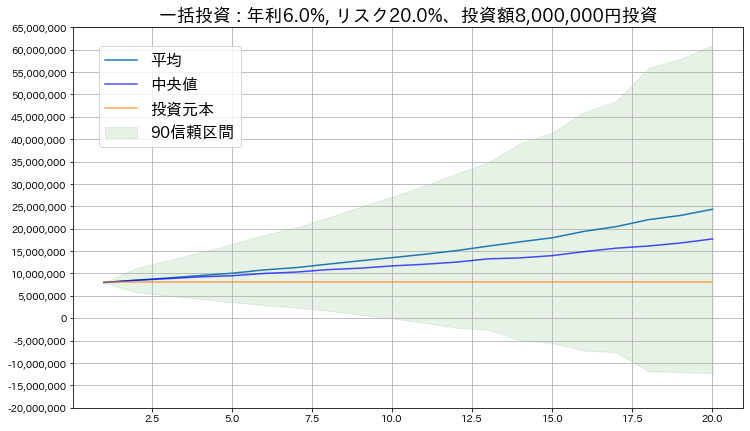

In [312]:
x = np.arange(1, simulation_term+1)
result_upper = result_std * 1.64 + result_mean
result_lower = result_std * -1.64 + result_mean
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(x, result_mean, label='平均') 
ax1.plot(x, result_median,c="b", label="中央値", alpha=0.7) #中央値
ax1.plot(x, [reserve_amount for i in x], label="投資元本", alpha=0.7) #単純投資合計額
ax1.fill_between(x, result_upper, result_lower, color='g', alpha=0.1, label='90信頼区間') #信頼区間
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title(f'一括投資 : 年利{interest_rate * 100:.1f}%, リスク{rate_risk * 100}%、投資額{reserve_amount:,}円投資', fontsize=18)
plt.grid()
plt.yticks(np.arange(-20000000, 70000000, 5000000))
plt.legend(bbox_to_anchor=(0.25, 0.95), loc='upper right', borderaxespad=0, fontsize=16)
plt.savefig(f'一括投資 : 年利{interest_rate * 100:.1f}%, リスク{rate_risk * 100}%、投資額{reserve_amount:,}円.jpeg')
plt.show()